# Import

## Library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score
# from helpers import report_clustering_kmeans, report_clustering_hierarchical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 

from sklearn import preprocessing


               alpha-2 alpha-3  country-code     iso_3166-2   region  \
name                                                                   
Afghanistan         AF     AFG             4  ISO 3166-2:AF     Asia   
Åland Islands       AX     ALA           248  ISO 3166-2:AX   Europe   
Albania             AL     ALB             8  ISO 3166-2:AL   Europe   
Algeria             DZ     DZA            12  ISO 3166-2:DZ   Africa   
American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

                     sub-region intermediate-region  region-code  \
name                                                               
Afghanistan       Southern Asia                 NaN        142.0   
Åland Islands   Northern Europe                 NaN        150.0   
Albania         Southern Europe                 NaN        150.0   
Algeria         Northern Africa                 NaN          2.0   
American Samoa        Polynesia                 NaN          9.0   

                su

## Dataset

In [2]:
iris = pd.read_csv( 'iris.data' , names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] )
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [38]:
x = iris[['SepalWidthCm','PetalWidthCm','PetalLengthCm']]
x

,SepalWidthCm,PetalWidthCm,PetalLengthCm
0,3.5,0.2,1.4
1,3.0,0.2,1.4
2,3.2,0.2,1.3
3,3.1,0.2,1.5
4,3.6,0.2,1.4
...,...,...,...
145,3.0,2.3,5.2
146,2.5,1.9,5.0
147,3.0,2.0,5.2
148,3.4,2.3,5.4


In [4]:
y = iris[['Species']]
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

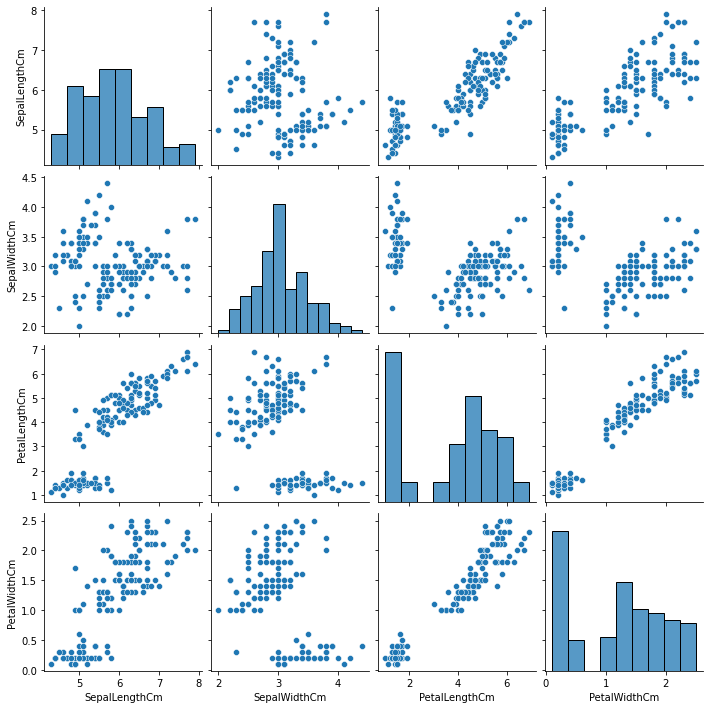

In [5]:
sns.pairplot(iris)

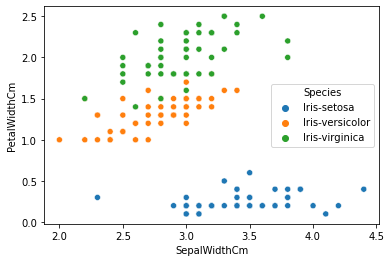

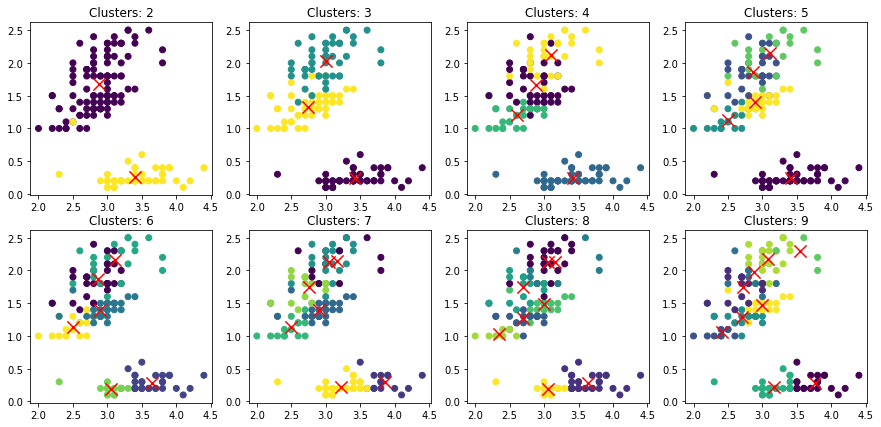

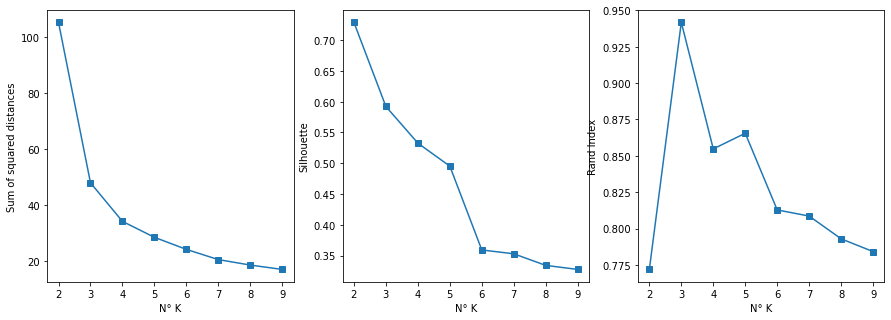

In [43]:
# Listas vacias donde guardar las metricas
dist_cent = []
sil_list = []
rand_list = []

# Plot para tener de referencia
sns.scatterplot(x='SepalWidthCm',y= 'PetalWidthCm', data=iris, hue = 'Species')


# Plot donde iremos mostrando los resultados
fig,axs = plt.subplots(2,4,figsize=(15,7))
axs = axs.ravel()    
for i,k in enumerate(range(2, 10)):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(x)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    # Silhouttte Score
    sil_score_i = silhouette_score(x,labels_i)
    sil_list.append(sil_score_i)        
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)
    dist_cent.append(cluster.inertia_)
    # Plots de los clusters
    axs[i].scatter(x='SepalWidthCm',y= 'PetalWidthCm',data=x,c=labels_i)
    axs[i].scatter(centers_i[:,0], centers_i[:,1], marker="x", color='r',s=150)
    axs[i].set_title('Clusters: ' + str(k))

plt.show()
# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
axs[2].plot(range(2, 10), rand_list, marker='s');
axs[2].set_xlabel('N° K')
axs[2].set_ylabel('Rand Index')    
plt.show()